In [1]:
import os
import sys
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.python.keras.preprocessing import image
from tensorflow.keras.applications import vgg16, VGG16

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(os.path.join(module_path, 'src/ebano'))

In [2]:
def load_images(image_path, target_size, preprocess_function):
    
    (_, _, filenames) = next(os.walk(image_path))
    
    images = []
    arrays = []
    for f in filenames:
        fp = os.path.join(image_path, f)
        
        img = image.load_img(fp, target_size=target_size)
        images.append(img)
        
        arr = image.img_to_array(img)
        arrays.append(arr)
        
    X = np.stack(arrays)
    X = vgg16.preprocess_input(X)
    
    return images, X

In [3]:
IMAGE_PATH = '../data/imagenet_batch'

VGG16_model = VGG16(include_top=True, weights='imagenet', classes=1000)
target_size = VGG16_model._feed_input_shapes[0][1:3]

imgs, X = load_images(IMAGE_PATH, target_size, vgg16.preprocess_input)

preds = VGG16_model.predict(X)

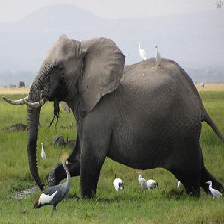

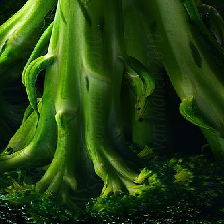

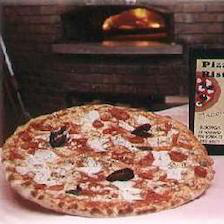

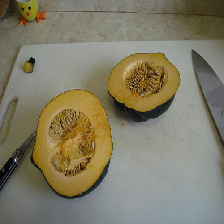

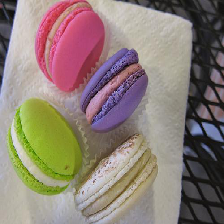

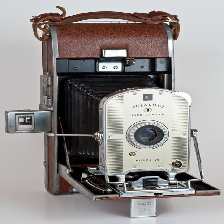

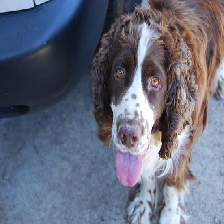

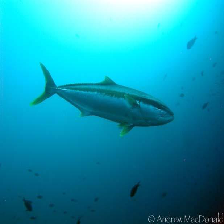

In [4]:
# Show images
for img in imgs:
    display(img)

In [5]:
# Show top-10 predictions
top_preds = 10
decoded_preds = vgg16.decode_predictions(preds, top=top_preds)

dfs = []
for i, decoded_pred in enumerate(decoded_preds):
    preds_indexes = np.argsort(preds[i])[::-1][:top_preds]  # Get indexes of top-10 predictions
    df_i = pd.DataFrame(
        decoded_pred,
        columns=["WNID", "Class name", "Prob."],
        index=[np.array([i] * len(preds_indexes)), preds_indexes]
    )
    dfs.append(df_i)

df_preds = pd.concat(dfs)
df_preds.style.background_gradient()

**Standard EBAnO**

In [10]:
import ebano_express

In [11]:
def preprocess_function(img, model_preproc):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return model_preproc(x)

In [12]:
importlib.reload(ebano_express)

localexps = []

for i, input_image in enumerate(imgs):
    coi = df_preds.loc[i].index[0]
    print("coi:", df_preds.loc[i].iloc[0])
    
    localexp = ebano_express.LocalExplanationModel(
        input_image=input_image,
        class_of_interest=coi,
        model=VGG16_model,
        preprocess_func=lambda x: preprocess_function(x, vgg16.preprocess_input),
        max_features=5,
        layers_to_analyze=5
    )

    localexp.fit_explanation(verbose=True)
    
    localexps.append(localexp)

coi: WNID          n01871265
Class name       tusker
Prob.          0.606049
Name: 101, dtype: object
preprocess_func total 0.016267799999695853
- feature_map shape: (1, 28, 28, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 512
- feature_map shape: (1, 28, 28, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 1024
- feature_map shape: (1, 14, 14, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 1536
- feature_map shape: (1, 14, 14, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 2048
- feature_map shape: (1, 14, 14, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 2560
- hypercolumn shape: (2560, 224, 224)
get_hypercolumns total 4.437514300000657
transpose total 5.151124699999855
_features_reduction total 21.475098199999593
kmeans total 5.176738399999522
> Computing explanation with '2' features...
fitting explanation total 17.548271999999997
kmeans total 9.692637499999364
> Computing explanation with '3' features...


/home/manuele/thesis/dal-ebano/src/ebano/ebano_express.py:80: RuntimeWarning: divide by zero encountered in double_scalars
  a = (1 - p_o / p_t)


fitting explanation total 7.2830510000003414
kmeans total 3.063864200000353
> Computing explanation with '4' features...
fitting explanation total 9.247627800000373
kmeans total 2.644799800000328
> Computing explanation with '5' features...
fitting explanation total 10.746567300000606
coi: WNID          n07714990
Class name     broccoli
Prob.          0.667097
Name: 937, dtype: object
preprocess_func total 0.0032910999998421175
- feature_map shape: (1, 28, 28, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 512
- feature_map shape: (1, 28, 28, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 1024
- feature_map shape: (1, 14, 14, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 1536
- feature_map shape: (1, 14, 14, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 2048
- feature_map shape: (1, 14, 14, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 2560
- hypercolumn shape: (2560, 224, 224)
get_hypercolumns total 7.483766899999864
transpose total 4.216021900000

/home/manuele/thesis/dal-ebano/src/ebano/ebano_express.py:80: RuntimeWarning: divide by zero encountered in double_scalars
  a = (1 - p_o / p_t)


fitting explanation total 12.23965810000027
kmeans total 2.931454899999153
> Computing explanation with '4' features...


/home/manuele/thesis/dal-ebano/src/ebano/ebano_express.py:80: RuntimeWarning: divide by zero encountered in double_scalars
  a = (1 - p_o / p_t)


fitting explanation total 12.34458900000027
kmeans total 9.510851500000172
> Computing explanation with '5' features...


/home/manuele/thesis/dal-ebano/src/ebano/ebano_express.py:80: RuntimeWarning: divide by zero encountered in double_scalars
  a = (1 - p_o / p_t)


fitting explanation total 13.548559199999545
coi: WNID                 n02102040
Class name    English_springer
Prob.                  0.95036
Name: 217, dtype: object
preprocess_func total 0.008011199999600649
- feature_map shape: (1, 28, 28, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 512
- feature_map shape: (1, 28, 28, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 1024
- feature_map shape: (1, 14, 14, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 1536
- feature_map shape: (1, 14, 14, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 2048
- feature_map shape: (1, 14, 14, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 2560
- hypercolumn shape: (2560, 224, 224)
get_hypercolumns total 7.13549200000034
transpose total 3.500229700000091
_features_reduction total 30.93063020000045
kmeans total 3.0028692999994746
> Computing explanation with '2' features...
fitting explanation total 15.00370920000023
kmeans total 1.9151796999994986
> Computing explanati

/home/manuele/thesis/dal-ebano/src/ebano/ebano_express.py:80: RuntimeWarning: divide by zero encountered in double_scalars
  a = (1 - p_o / p_t)


fitting explanation total 12.124673499999517
kmeans total 2.8799888000003193
> Computing explanation with '5' features...


/home/manuele/thesis/dal-ebano/src/ebano/ebano_express.py:80: RuntimeWarning: divide by zero encountered in double_scalars
  a = (1 - p_o / p_t)


fitting explanation total 12.180922499999724
coi: WNID                  n01484850
Class name    great_white_shark
Prob.                  0.433071
Name: 2, dtype: object
preprocess_func total 0.01360579999982292
- feature_map shape: (1, 28, 28, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 512
- feature_map shape: (1, 28, 28, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 1024
- feature_map shape: (1, 14, 14, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 1536
- feature_map shape: (1, 14, 14, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 2048
- feature_map shape: (1, 14, 14, 512)
- upscaled shape: (224, 224)
- len hypercolumns: 2560
- hypercolumn shape: (2560, 224, 224)
get_hypercolumns total 6.904954599999655
transpose total 3.574654200000623
_features_reduction total 21.40055519999987
kmeans total 6.3627950000000055
> Computing explanation with '2' features...
fitting explanation total 9.658642299999883
kmeans total 1.999228900000162
> Computing explanati

/home/manuele/thesis/dal-ebano/src/ebano/ebano_express.py:80: RuntimeWarning: divide by zero encountered in double_scalars
  a = (1 - p_o / p_t)


fitting explanation total 13.138642400000208


coi: WNID          n01871265
Class name       tusker
Prob.          0.606049
Name: 101, dtype: object


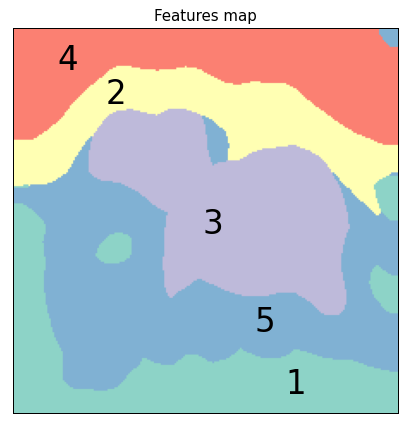

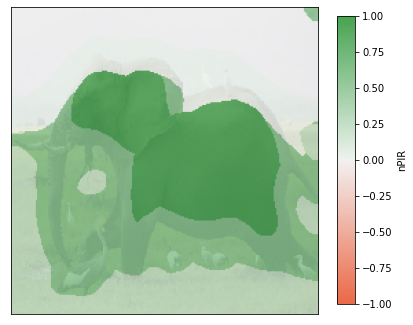

,1,2,3,4,5
nPIR,0.230229,0.010199,0.934825,-0.005763,0.587755
nPIRP,0.766112,-0.008824,0.398015,-0.002949,0.997795


coi: WNID          n07714990
Class name     broccoli
Prob.          0.667097
Name: 937, dtype: object


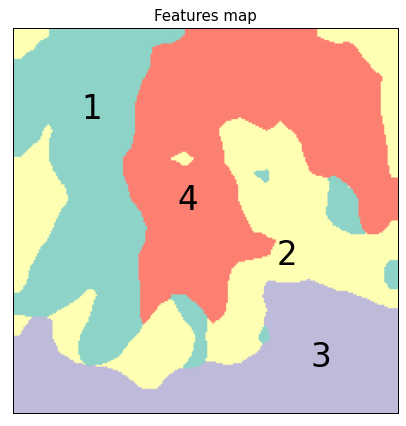

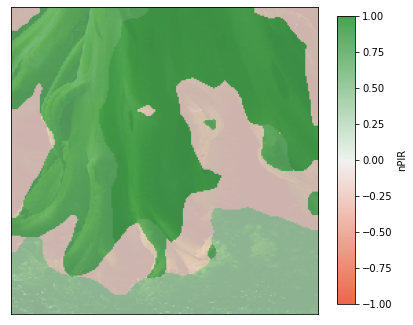

,1,2,3,4
nPIR,0.844234,-0.221006,0.425271,0.997540
nPIRP,0.628097,0.284534,0.986624,0.720431


coi: WNID          n07873807
Class name        pizza
Prob.          0.752494
Name: 963, dtype: object


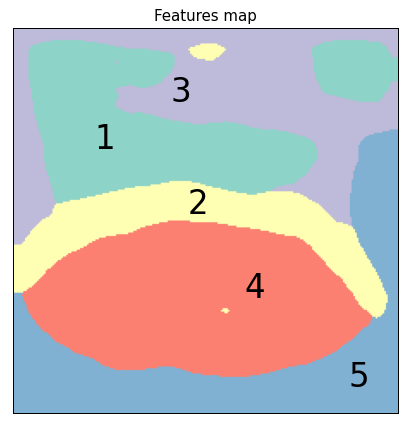

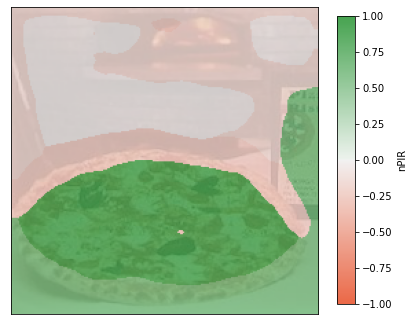

,1,2,3,4,5
nPIR,-0.038180,-0.255371,-0.169361,0.999855,0.726054
nPIRP,0.084276,0.633694,0.605310,0.846113,0.984955


coi: WNID             n07717410
Class name    acorn_squash
Prob.              0.68888
Name: 941, dtype: object


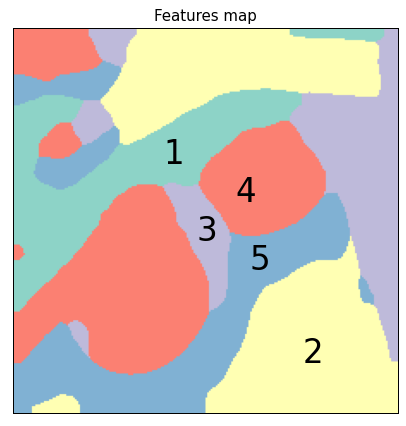

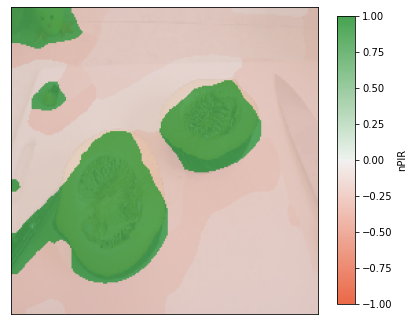

,1,2,3,4,5
nPIR,-0.150231,-0.212682,-0.264255,0.983205,-0.299180
nPIRP,0.047092,0.194445,0.174700,0.589599,0.211314


coi: WNID            n04409515
Class name    tennis_ball
Prob.            0.271865
Name: 852, dtype: object


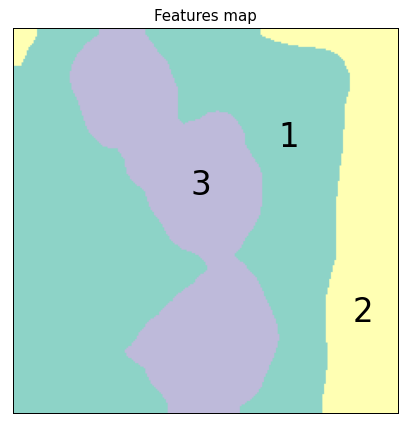

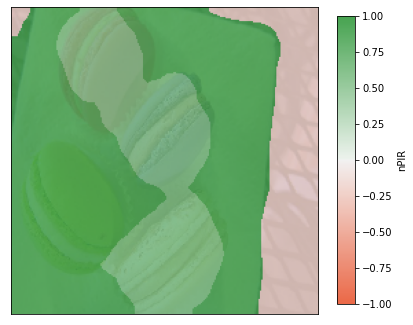

,1,2,3
nPIR,0.996906,-0.216353,0.692165
nPIRP,-0.012052,0.090452,0.276201


coi: WNID                n03976467
Class name    Polaroid_camera
Prob.                0.995804
Name: 732, dtype: object


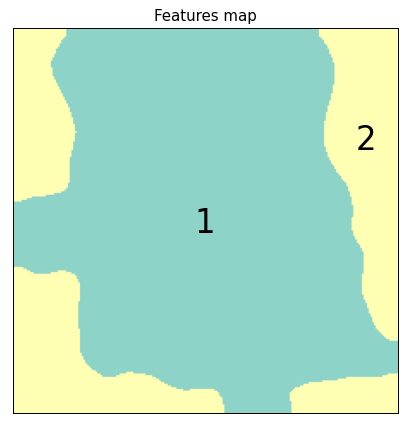

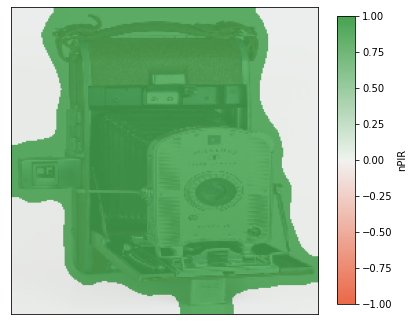

,1,2
nPIR,0.999253,0.000257
nPIRP,0.999921,0.026965


coi: WNID                 n02102040
Class name    English_springer
Prob.                  0.95036
Name: 217, dtype: object


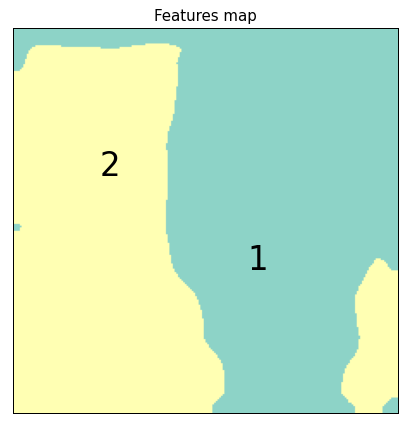

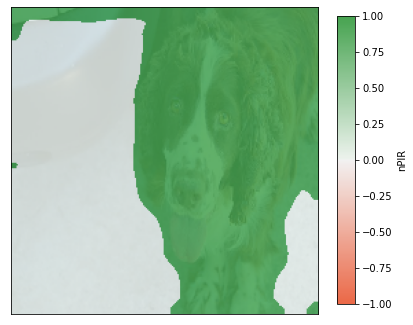

,1,2
nPIR,0.999885,0.013063
nPIRP,0.958791,0.602235


coi: WNID                  n01484850
Class name    great_white_shark
Prob.                  0.433071
Name: 2, dtype: object


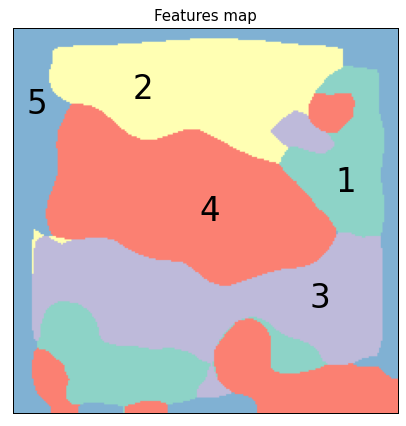

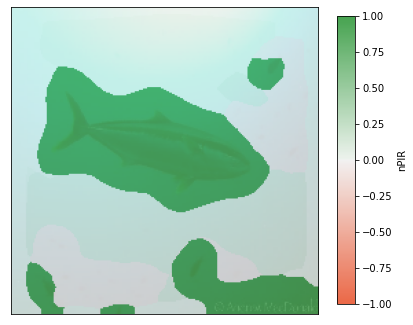

,1,2,3,4,5
nPIR,-0.058786,0.039083,0.092418,0.945402,0.021841
nPIRP,0.034095,0.915920,1.000000,-0.124693,0.009507


In [13]:
for i, localexp in enumerate(localexps):
    print("coi:", df_preds.loc[i].iloc[0])
    
    localexp.best_explanation.show_features_map()
    plt.show()
    plt.close()
    
    localexp.best_explanation.show_visual_explanation()
    plt.show()
    plt.close()
    
    display(localexp.best_explanation.get_numerical_explanation().loc[:, ["nPIR", "nPIRP"]].T)

**Parallel EBAnO**

In [12]:

n_masks = 0
X_masks_map = []
X_masks_labels = []
for i in range(4):
    n_masks += min_features+i
    X_masks_labels.extend([x for x in range(1,min_features+i+1)])
    X_masks_map.extend([min_features+i] * (min_features+i))

In [15]:
np.array([[1,2,3],[1,2,3]]) == 3

array([[False, False,  True],
       [False, False,  True]])

In [10]:
X_masks_map

[2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

In [13]:
X_masks_labels

[1, 2, 1, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4, 5]

In [11]:
[x for x in range(

0

In [6]:
import parallebano

In [7]:
importlib.reload(parallebano)

explainer = parallebano.Explainer(
    model=VGG16_model,
    preprocess_input_fn=vgg16.preprocess_input,
    input_shape=(224, 224, 3),
    layers_to_analyze=5
)

explainer.fit_batch(imgs, np.array([0,0,0,0,0,0,0,0]))

-- extract hypercols:  12.014690699999989
performing PCA 0
performing PCA 1
performing PCA 2
performing PCA 3
performing PCA 4
performing PCA 5
performing PCA 6
performing PCA 7
-- dimensionality reduction:  209.2849409
clustering starting for image id 0
computing explanation for 2 n_features
computing explanation for 3 n_features
computing explanation for 4 n_features
computing explanation for 5 n_features
-- clustering 0 elapsed: 14.008761700000036
clustering starting for image id 1
computing explanation for 2 n_features
computing explanation for 3 n_features
computing explanation for 4 n_features
computing explanation for 5 n_features
-- clustering 1 elapsed: 11.976708499999972
clustering starting for image id 2
computing explanation for 2 n_features
computing explanation for 3 n_features
computing explanation for 4 n_features
computing explanation for 5 n_features
-- clustering 2 elapsed: 17.099255900000003
clustering starting for image id 3
computing explanation for 2 n_features
c

RuntimeError: STOP

In [ ]:
import gc
gc.collect()